In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('log/episode_log.csv')

In [3]:
df.head()

,score,episode reward,running reward,episode frames,total frames,Q values
0,130,44,44.0,165,165,7.711532
1,130,44,44.0,265,430,8.760769
2,320,80,56.0,497,927,9.334431
3,280,80,62.0,570,1497,9.716899
4,80,32,56.0,262,1759,10.043714


### Mean Q State-Action values

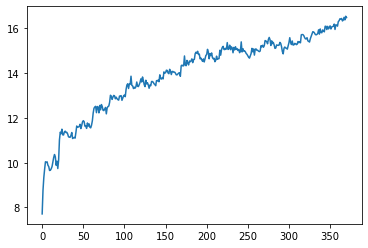

In [4]:
plt.plot(df['Q values'])

### Mean Score over last 100 episodes

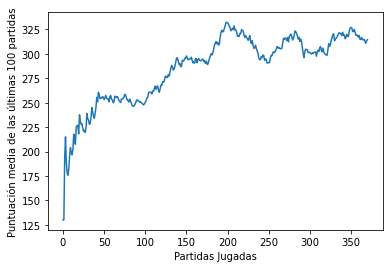

In [10]:
mean_score = 0
scores = []
running_reward = []
for i in df['score']:
    scores.append(i)
    if len(scores) > 100:
        del scores[0]
    
    mean_reward = np.mean(scores)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación media de las últimas 100 partidas')
plt.plot(running_reward)
plt.savefig('Data/early_training_score')

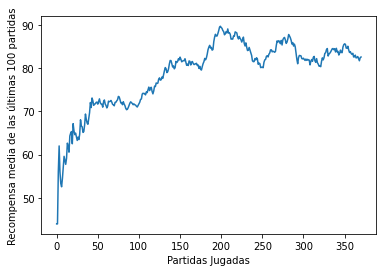

In [12]:
mean_score = 0
scores = []
running_reward = []
for i in df['episode reward']:
    scores.append(i)
    if len(scores) > 100:
        del scores[0]
    
    mean_reward = np.mean(scores)
    running_reward.append(mean_reward)

plt.xlabel('Partidas Jugadas')
plt.ylabel('Recompensa media de las últimas 100 partidas')
plt.plot(running_reward)

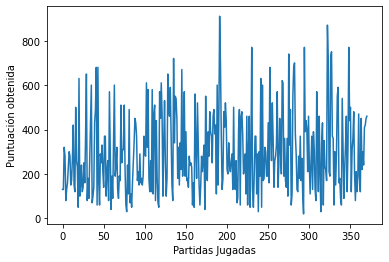

In [7]:
plt.plot(df['score'])
plt.xlabel('Partidas Jugadas')
plt.ylabel('Puntuación obtenida')
plt.savefig('Data/early_training_score')

### Mean frames per episode over last 100 episodes

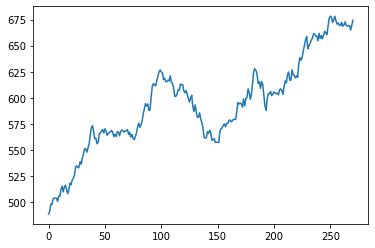

In [8]:
mean_frames = 0
frames = []
last_frames = []
for i in df['episode frames']:
    frames.append(i)
    if len(frames) > 100:
        del frames[0]
    
    mean_frames = np.mean(frames)
    last_frames.append(mean_frames)
    
plt.plot(last_frames[100:])